In [3]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets


In [ ]:
county1 = input("What county? ")

In [2]:
ca_counties_cases_csv = "covid19cases_test.csv"


# Import us counties 
ca_counties_cases_df = pd.read_csv(ca_counties_cases_csv, encoding="utf-8")
ca_counties_cases_df.sort_values(by = 'area', ascending = True)



,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,4/28/2021,Alameda,County,1685886.0,0.0,0.0,NaN,NaN,89.0,0.0,9326.0
309,6/23/2020,Alameda,County,1685886.0,150.0,3.0,4758.0,183.0,215.0,0.0,3957.0
308,6/24/2020,Alameda,County,1685886.0,181.0,1.0,4832.0,270.0,83.0,2.0,3386.0
307,6/25/2020,Alameda,County,1685886.0,163.0,1.0,4661.0,202.0,156.0,7.0,3150.0
306,6/26/2020,Alameda,County,1685886.0,191.0,2.0,4979.0,233.0,104.0,2.0,3528.0
...,...,...,...,...,...,...,...,...,...,...,...
27324,12/5/2020,Yuba,County,79290.0,42.0,0.0,193.0,38.0,50.0,0.0,301.0
27323,12/6/2020,Yuba,County,79290.0,37.0,0.0,196.0,45.0,65.0,0.0,306.0
27322,12/7/2020,Yuba,County,79290.0,44.0,0.0,475.0,58.0,88.0,0.0,314.0
27348,11/11/2020,Yuba,County,79290.0,23.0,0.0,199.0,15.0,8.0,0.0,127.0


In [39]:
ca_counties_vaccine_csv = "covid19vaccinesbycounty.csv"
ca_counties_vaccine_df = pd.read_csv(ca_counties_vaccine_csv, encoding="utf-8")
ca_counties_vaccine_df.sort_values(by = 'county', ascending = True)

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
654,Alameda,4/26/2021,7800,1419774,5459,838194,2331,497177,10,84403,4872,320176,2910,590911,4889,911087,California
557,Alameda,1/19/2021,5521,82182,3329,49891,2192,32291,0,0,4334,55177,1185,13496,4336,68673,California
558,Alameda,1/20/2021,6691,88873,4026,53917,2665,34956,0,0,5398,59298,1281,14777,5402,74075,California
559,Alameda,1/21/2021,7741,96614,3382,57299,4359,39315,0,0,6913,65392,822,15599,6916,80991,California
560,Alameda,1/22/2021,6838,103452,2032,59331,4806,44121,0,0,5700,69963,1131,16730,5702,86693,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7851,Yuba,1/22/2021,103,2534,6,1195,97,1339,0,0,94,1859,9,338,94,2197,California
7850,Yuba,1/21/2021,210,2431,95,1189,115,1242,0,0,202,1774,8,329,202,2103,California
7849,Yuba,1/20/2021,132,2221,87,1094,45,1127,0,0,109,1580,23,321,109,1901,California
7847,Yuba,1/18/2021,60,2009,32,978,28,1031,0,0,35,1444,25,283,35,1727,California


In [44]:

ca_counties_cases_df = ca_counties_cases_df.loc[ca_counties_cases_df["area"]== county1]
ca_counties_cases_df.sort_values(by = 'date', ascending = False)

,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
8838,9/9/2020,Los Angeles,County,10257557.0,932.0,28.0,42117.0,1534.0,659.0,57.0,13500.0
8839,9/8/2020,Los Angeles,County,10257557.0,1050.0,31.0,46402.0,1767.0,413.0,4.0,32324.0
8840,9/7/2020,Los Angeles,County,10257557.0,629.0,29.0,10077.0,477.0,488.0,26.0,42790.0
8841,9/6/2020,Los Angeles,County,10257557.0,533.0,23.0,9299.0,498.0,744.0,3.0,41226.0
8842,9/5/2020,Los Angeles,County,10257557.0,573.0,23.0,12005.0,600.0,1176.0,24.0,47112.0
...,...,...,...,...,...,...,...,...,...,...,...
8712,1/13/2021,Los Angeles,County,10257557.0,11610.0,255.0,121432.0,16325.0,11690.0,263.0,141644.0
8713,1/12/2021,Los Angeles,County,10257557.0,13121.0,282.0,123218.0,17150.0,11861.0,306.0,167718.0
8714,1/11/2021,Los Angeles,County,10257557.0,14517.0,293.0,147165.0,19423.0,12651.0,134.0,171796.0
8715,1/10/2021,Los Angeles,County,10257557.0,5463.0,296.0,38613.0,5932.0,13834.0,159.0,168816.0


In [41]:
administered_date = ca_counties_vaccine_df.loc[ca_counties_vaccine_df["county"]==county1]
ca_counties_vaccine_df.sort_values(by = 'administered_date', ascending = False)

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
115,All CA Counties,4/9/2021,479745,22548011,239151,11535315,162738,10114496,77856,898203,223031,6075543,255818,8776544,304500,14852087,NaN
1475,Del Norte,4/9/2021,201,11721,47,4568,80,6583,74,570,97,2895,103,4667,169,7562,California
6769,Sonoma,4/9/2021,6743,362622,3748,179751,2111,171788,884,11083,3458,87006,3273,143045,4337,230051,California
3656,Modoc,4/9/2021,11,4195,2,427,6,3517,3,251,2,403,9,2020,4,2423,California
2127,Imperial,4/9/2021,2135,82065,628,36836,892,37609,615,7620,830,22698,1301,33481,1445,56179,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,Inyo,1/1/2021,1,651,0,600,1,51,0,0,1,651,0,0,1,651,California
2931,Madera,1/1/2021,1,1141,1,658,0,483,0,0,1,1141,0,0,1,1141,California
1262,Contra Costa,1/1/2021,60,18218,23,13070,37,5148,0,0,60,18216,0,0,60,18216,California
747,Amador,1/1/2021,1,563,0,474,1,89,0,0,1,563,0,0,1,563,California


In [43]:
ca_counties_cases_df['area']


8607    Los Angeles
8608    Los Angeles
8609    Los Angeles
8610    Los Angeles
8611    Los Angeles
           ...     
9055    Los Angeles
9056    Los Angeles
9057    Los Angeles
9058    Los Angeles
9059    Los Angeles
Name: area, Length: 453, dtype: object

In [32]:
##ca_counties_df = ca_counties_df.groupby('date')
##ca_counties_df

Text(0, 0.5, 'Cases')

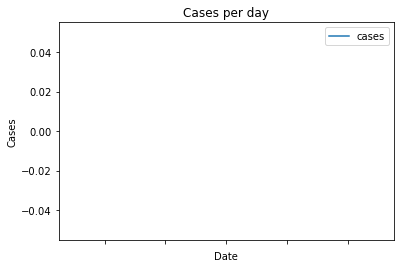

In [33]:
cases_plot = ca_counties_cases_df.plot('date', 'cases',kind="line")
plt.title("Cases per day")
plt.xlabel("Date")
plt.ylabel("Cases")

Text(0, 0.5, 'Deaths')

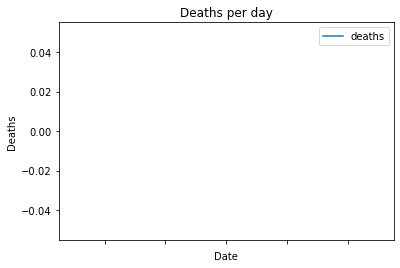

In [34]:
cases_plot = ca_counties_cases_df.plot('date', 'deaths',kind="line")
plt.title("Deaths per day")
plt.xlabel("Date")
plt.ylabel("Deaths")

Text(0, 0.5, 'vaccine')

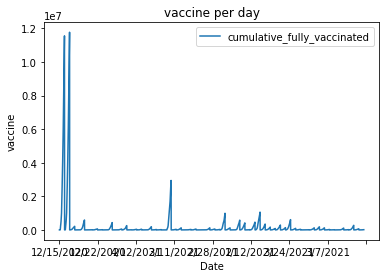

In [35]:
vaccine_plot = ca_counties_vaccine_df.plot('administered_date', 'cumulative_fully_vaccinated',kind="line")
plt.title("vaccine per day")
plt.xlabel("Date")
plt.ylabel("vaccine")

In [ ]:
covid_csv = "covid_19_data.csv"

# Import covid data by country, including US data 
covid_df = pd.read_csv(covid_csv, encoding="utf-8")
covid_df

In [ ]:
us_covid_csv = "covid_19_US.csv"

# Import covid data by country, including US data 
us_covid_df = pd.read_csv(us_covid_csv, encoding="utf-8")
us_covid_df

In [ ]:
#California counties vaccination rates by day with demographic
ca_covid_csv = "covid19vaccinesbycountybydemographic.csv"
ca_covid_df = pd.read_csv(ca_covid_csv, encoding="utf-8")
ca_covid_df

In [ ]:
#sort by administered date
ca_covid_df.sort_values(by = 'administered_date', ascending = False)
ca_covid_df

In [ ]:
ca_covid_test = ca_covid_df.groupby(['county']).mean()
ca_covid_test

In [ ]:
#California counties, with a breakdown of vaccine type and totals by day
ca_county_csv = "covid19vaccinesbycounty.csv"
ca_county_df = pd.read_csv(ca_county_csv, encoding='utf-8')
ca_county_df

In [ ]:
#remove extra counties that are not part of CA or are unknown

ca_county_df = ca_county_df[ca_county_df.county != 'All CA Counties']
ca_county_df = ca_county_df[ca_county_df.county != 'All CA and Non-CA Counties']
ca_county_df = ca_county_df[ca_county_df.county != 'Outside California']
clean_ca_county_df = ca_county_df[ca_county_df.county != 'Unknown']

clean_ca_county_df

In [ ]:
Capomulin_plot = Capomulin_mouse.plot('administered_date', 'Tumor Volume (mm3)',kind="line")
plt.title("Capomulin Treatment For Mouse x401")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")